## Bibliotecas

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

## Funções

In [13]:
def preprocess_image(img_path):
    img = load_img(img_path, target_size=(256, 256))
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

## Predição

In [14]:
# Carregando o modelo salvo e as imagens para segmentação
model_path = r"C:\Users\mathe\Desktop\BemAgro\model\best_model.keras"
input_img_path = r"C:\Users\mathe\Desktop\BemAgro\imagens_para_inferencia"

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


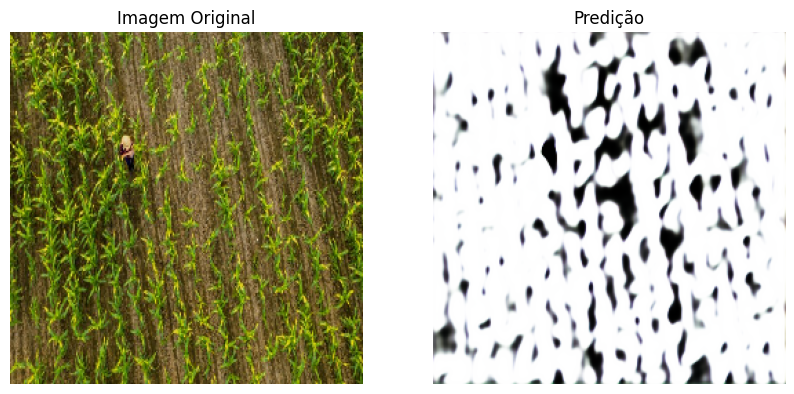

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


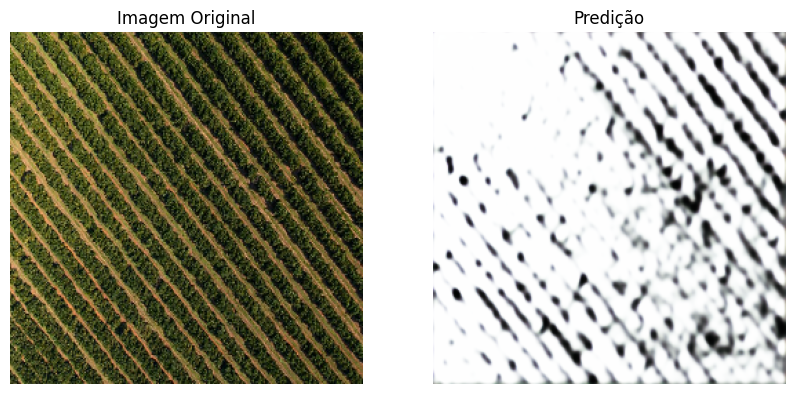

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


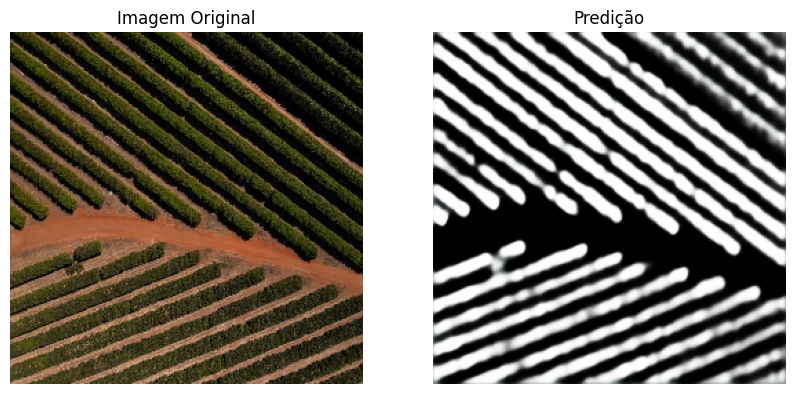

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


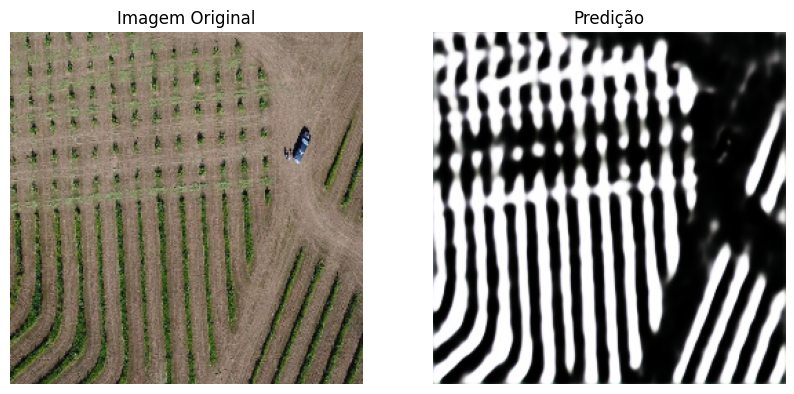

In [16]:
model = load_model(model_path)

# Realiza a inferência das imagens
for img_name in os.listdir(input_img_path):
    img_path = input_img_path + "\\" + img_name
    preprocessed_img = preprocess_image(img_path)

    # Predição
    prediction = model.predict(preprocessed_img)
    prediction = np.squeeze(prediction, axis=0)

    original_img = load_img(img_path, target_size=(256, 256))
    original_img_array = img_to_array(original_img) / 255.0

    # Plot
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(original_img_array)
    axs[0].set_title('Imagem Original')
    axs[0].axis('off')

    axs[1].imshow(prediction, cmap='gray')
    axs[1].set_title('Predição')
    axs[1].axis('off')

    plt.show()